In [2]:
import pandas as pd

In [8]:
data = pd.read_csv(r"C:\Users\Dell5559\Downloads\econ_data_TPS_2209.csv")

In [5]:
data.head()

,"LOCATION\t""TIME""\t""inflation""\t""unempr"""
0,"Belgium\t""2020-01""\t1.405195\t5.2"
1,"Belgium\t""2020-02""\t1.096572\t5.1"
2,"Belgium\t""2020-03""\t0.6247129\t5.1"
3,"Belgium\t""2020-04""\t0.5692774\t5.2"
4,"Belgium\t""2020-05""\t0.4773708\t5.4"


In [6]:
print(data.tail(20))

    LOCATION\t"TIME"\t"inflation"\t"unempr"
124       Spain\t"2020-05"\t-0.915837\t15.4
125      Spain\t"2020-06"\t-0.3417964\t15.9
126      Spain\t"2020-07"\t-0.6198964\t16.2
127      Spain\t"2020-08"\t-0.5192718\t16.4
128      Spain\t"2020-09"\t-0.3698781\t16.4
129      Spain\t"2020-10"\t-0.8091754\t16.3
130      Spain\t"2020-11"\t-0.8149378\t16.2
131      Spain\t"2020-12"\t-0.5321318\t16.2
132        Spain\t"2021-01"\t0.457077\t15.8
133     Spain\t"2021-02"\t-0.01649076\t15.6
134        Spain\t"2021-03"\t1.341928\t15.4
135        Spain\t"2021-04"\t2.229122\t15.5
136        Spain\t"2021-05"\t2.717201\t15.5
137        Spain\t"2021-06"\t2.732454\t15.4
138        Spain\t"2021-07"\t2.881537\t15.1
139        Spain\t"2021-08"\t3.301745\t14.6
140        Spain\t"2021-09"\t4.007239\t14.2
141        Spain\t"2021-10"\t5.366842\t13.7
142        Spain\t"2021-11"\t5.516243\t13.4
143        Spain\t"2021-12"\t6.549901\t13.3


In [9]:
data = pd.read_csv(r"C:\Users\Dell5559\Downloads\econ_data_TPS_2209.csv", sep ='\t')

data.head(10)

,LOCATION,TIME,inflation,unempr
0,Belgium,2020-01,1.405195,5.2
1,Belgium,2020-02,1.096572,5.1
2,Belgium,2020-03,0.624713,5.1
3,Belgium,2020-04,0.569277,5.2
4,Belgium,2020-05,0.477371,5.4
5,Belgium,2020-06,0.597042,5.7
6,Belgium,2020-07,0.734214,6.2
7,Belgium,2020-08,0.816963,6.5
8,Belgium,2020-09,0.903726,6.4
9,Belgium,2020-10,0.744280,6.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   144 non-null    object 
 1   TIME       144 non-null    object 
 2   inflation  144 non-null    float64
 3   unempr     144 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.6+ KB


In [11]:
data.describe()

,inflation,unempr
count,144.000000,144.000000
mean,1.830804,7.575694
std,1.971312,4.085215
min,-0.915837,2.900000
25%,0.354730,3.700000
50%,1.295174,6.950000
75%,2.925000,9.600000
max,8.600000,16.400000


In [12]:
data['LOCATION'].unique()

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
data['TIME'] = pd.to_datetime(data['TIME'])

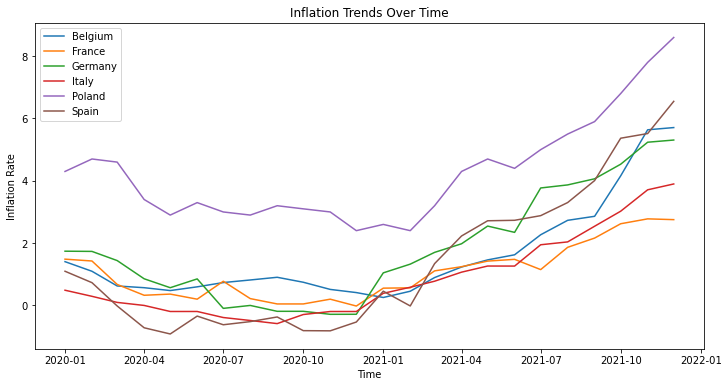

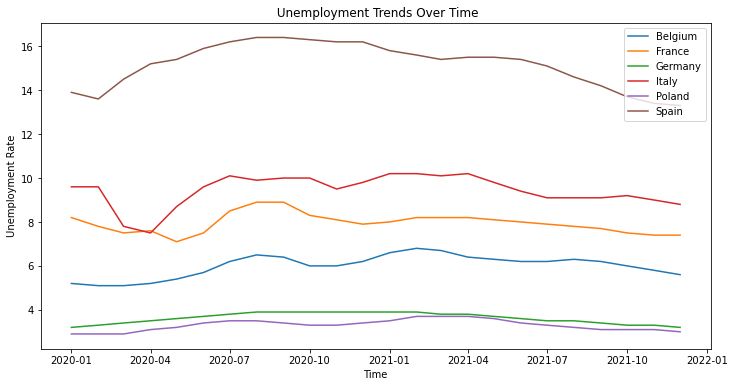

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='TIME', y= 'inflation', data = data, hue= 'LOCATION')
plt.title('Inflation Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='TIME', y= 'unempr', data= data, hue= 'LOCATION')
plt.title(' Unemployment Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

In [16]:
corellation_matrix = data.groupby('LOCATION')[['inflation', 'unempr']].corr().unstack()['inflation']['unempr'] 

print("Corellation between Inflation and Unemployment is :\n ", corellation_matrix)


Corellation between Inflation and Unemployment is :
  LOCATION
Belgium   -0.104259
France    -0.422712
Germany   -0.738997
Italy     -0.243021
Poland    -0.534578
Spain     -0.747554
Name: unempr, dtype: float64


In [18]:
data_poland = data[data['LOCATION']== 'Poland']

corellation_poland = data_poland['inflation'] .corr(data_poland[ 'unempr'])

print( "Corellation between Inflation and Unemployment in Poland is : \n", corellation_poland)

Corellation between Inflation and Unemployment in Poland is : 
 -0.5345781130681847


In [20]:
data['Year'] = data['TIME'].dt.year

yearly_data= data.groupby(['Year', 'LOCATION'])[['inflation','unempr']].mean().reset_index()

print(yearly_data)

    Year LOCATION  inflation     unempr
0   2020  Belgium   0.741357   5.750000
1   2020   France   0.479136   8.025000
2   2020  Germany   0.512575   3.666667
3   2020    Italy  -0.137116   9.341667
4   2020   Poland   3.400000   3.233333
5   2020    Spain  -0.319130  15.516667
6   2021  Belgium   2.440845   6.258333
7   2021   France   1.642045   7.866667
8   2021  Germany   3.143910   3.575000
9   2021    Italy   1.875626   9.516667
10  2021   Poland   5.100000   3.366667
11  2021    Spain   3.090400  14.791667


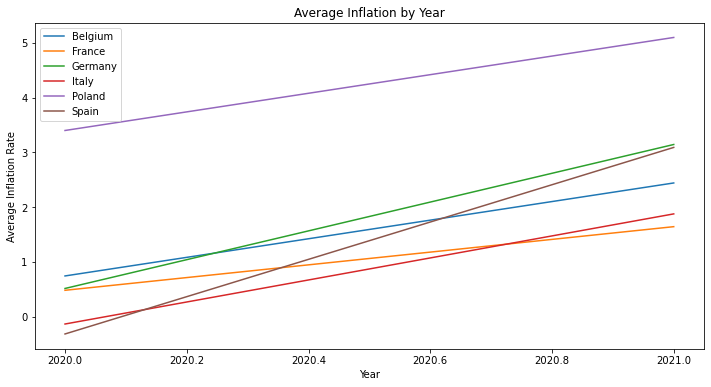

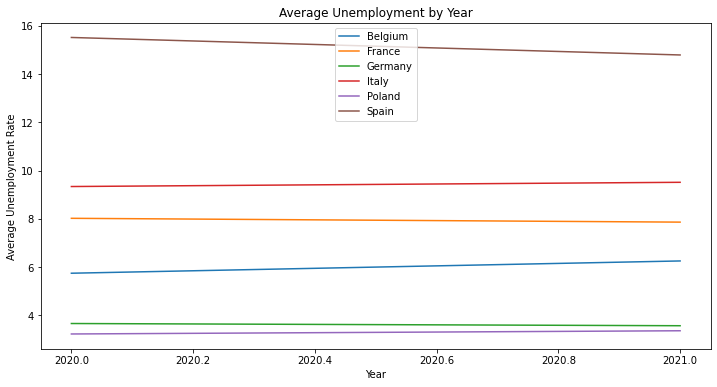

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='inflation', data=yearly_data, hue='LOCATION')
plt.title('Average Inflation by Year')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='unempr', data=yearly_data, hue='LOCATION')
plt.title('Average Unemployment by Year')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.legend()
plt.show()